# Sveučilište u Zagrebu  
## Fakultet organizacije i informatike  
### Varaždin  

# **Analiza podataka o kriminalnim aktivnostima**  
#### Projekt  
## **Programiranje za analizu podataka**  
#### **Jakov Bišćan**  
Varaždin, 2025.  

# **Sadržaj**
1. **Uvod**
    - Projekt istražuje povezanost vremenskih i geografskih faktora s kriminalnim aktivnostima.
    - Podaci o kriminalu iz javnih izvora kombinirani su s prostornim podacima iz OpenStreetMap API-ja.
    - Cilj je analizirati utjecaj vremenskih i geografskih čimbenika na učestalost i vrstu krimina1a.

2. **Učitavanje i priprema podataka**
    - Učitavanje CSV datoteke s podacima o kriminalu.
    - Obrada datuma i zamjena nedostajućih vrijednosti.
    - Kategorizacija vremena u dan 2li noć.

3. **Dohvaćanje dodatnih podataka**
    - Koristi se OpenStreetMap API za dohvaćanje informacija o objektima u okolici koordinata kriminalni3 događaja.

4. **Pohrana podataka u bazu**
    - Podaci se spremaju u SQLite bazu podataka radi daljnje analize 4 integracije.

5. **Analiza podataka i vizualizacija**
    - Prikaz grafova koji povezuju kriminal s vremenskim i geografskim čimbenicima.
    - Bar grafovi i scatter plotovi za analizu broja objekata u okolici i učes5alosti kriminala.

6. **REST API za pristup podacima**
    - Implementacija REST API-ja pomoću Flask-a za dohvaćanje podataka iz baze i njihovo prikazi6anje u JSON formatu.

7. **Zaključak**
    - Zaključci o povezanosti vremenskih i geografskih čimbenika s vrstama kriminala.
    - Preporuke za daljnje analize i unapređenje aplikacije.


# **Uvod**

Kriminalne aktivnosti predstavljaju značajan izazov za društvo, a njihovo razumijevanje i prevencija ključni su za osiguravanje sigurnosti zajednice. Ovaj projekt istražuje povezanost vremenskih (doba dana, dan u tjednu, sezona) i geografskih faktora (blizina urbanih sadržaja, gustoća naseljenosti) s vrstama kriminalnih aktivnosti.

Podaci o kriminalu prikupljeni su iz javno dostupnih izvora poput Data.gov, dok su prostorni podaci o okolici mjesta kriminalnih događaja dohvaćeni putem OpenStreetMap API-ja. Kombinacijom ovih podataka omogućava se analiza učestalosti i vrsta kriminala u različitim vremenskim i prostornim uvjetima.

Cilj projekta je razumjeti kako vremenski i geografski čimbenici utječu na kriminal, identificirati obrasce ponašanja te omogućiti bolje planiranje preventivnih mjera. Podaci se spremaju u bazu podataka, analiziraju pomoću vizualizacija te postaju dostupni putem REST API-ja, što omogućava daljnje proširenje i integraciju s drugim sustavima.

Projekt je organiziran u nekoliko faza:
1. Učitavanje i obrada podataka o kriminalu.
2. Dohvaćanje dodatnih podataka o geografskim čimbenicima.
3. Pohrana podataka u bazu.
4. Analiza i vizualizacija rezultata.
5. Implementacija REST API-ja za pristup podacima.

Ova struktura osigurava temeljitu analizu podataka, omogućujući donošenje zaključaka o povezanosti kriminalnih aktivnosti s vremenskim i geografskim čimbenicima.


# **1.Učitavanje i priprema podataka**

Opis:
Ovaj dio koda učitava CSV datoteku koja sadrži podatke o kriminalu. Koristi se biblioteka Pandas za učitavanje i analizu podataka. Prikazuje prvih nekoliko redaka kako bi se dobio pregled strukture podataka.

In [1]:
import pandas as pd

# Učitavanje CSV datoteke
file_path = 'Crime_Data_from_2020_to_Present (1).csv'
crime_data = pd.read_csv(file_path)

# Prikaz prvih nekoliko redaka kako bismo razumjeli strukturu podataka
crime_data.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,242108414,04/25/2024 12:00:00 AM,04/25/2024 12:00:00 AM,1600.0,21.0,Topanga,2146.0,1.0,420.0,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,AO,Adult Other,420.0,998.0,NaN,NaN,21400 SHERMAN WY,NaN,34.2010,-118.5977
1,"240604934,01/21/2024 12:00:00 AM,01/21/2024 12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,241110315,08/29/2024 12:00:00 AM,08/28/2024 12:00:00 AM,1500.0,11.0,Northeast,1123.0,1.0,420.0,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,3600 BRUNSWICK AV,NaN,34.1187,-118.2604
3,"242107187,03/22/2024 12:00:00 AM,03/22/2024 12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,241010884,09/06/2024 12:00:00 AM,09/05/2024 12:00:00 AM,1800.0,10.0,West Valley,1027.0,1.0,330.0,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,NaN,NaN,NaN,6800 LOUISE AV,NaN,34.1939,-118.5098


Opis:
Ovdje se podaci pretvaraju u pravilne formate:

Datumi (Date Rptd, DATE OCC) konvertiraju se u datetime format radi lakše analize.
Nedostajuće vrijednosti u stupcima Vict Sex i Vict Age zamjenjuju se zadanim vrijednostima ("Nepoznato" i medijanom dobi).
Uklanjaju se redci koji nemaju podatke o geografskim koordinatama (LAT, LON) jer su ključni za analizu.

In [3]:
# Ako znate format, možete ga navesti direktno, primjerice:
crime_data['Date Rptd'] = pd.to_datetime(crime_data['Date Rptd'], format='%m/%d/%Y', errors='coerce')
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'], format='%m/%d/%Y', errors='coerce')

# Ako format nije točan, možemo pokušati s automatskim pokušajem ili ispravljanjem za razne varijante:
crime_data['Date Rptd'] = pd.to_datetime(crime_data['Date Rptd'], errors='coerce')
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'], errors='coerce')



In [5]:
# Zamjena nedostajućih vrijednosti
crime_data['Vict Sex'] = crime_data['Vict Sex'].fillna('Nepoznato')
crime_data['Vict Age'] = crime_data['Vict Age'].fillna(crime_data['Vict Age'].median())


In [7]:
# Provjera nedostajućih podataka
crime_data.isnull().sum()

# Opcionalno, brišemo sve redove s nedostajućim ključnim podacima
crime_data.dropna(subset=['LAT', 'LON'], inplace=True)


Instalacija za prikaz na mapi ali nisam koristio na kraju

In [21]:
!pip install geopy


   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --------- ----------------------------- 30.7/125.4 kB 435.7 kB/s eta 0:00:01
   ------------------- ------------------- 61.4/125.4 kB 550.5 kB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 921.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB 1.9 MB/s eta 0:00:00


# **2.Dohvaćanje dodatnih podataka**

Ovaj kod analizira podatke o kriminalnim događajima i povezuje ih s geografskim informacijama iz OpenStreetMap API-ja. Prvo, podaci o kriminalu učitavaju se iz CSV datoteke, a vrijeme događaja kategorizira se u "dan" ili "noć" na temelju sata. Zatim, za svaku lokaciju događaja (definiranu koordinatama LAT i LON), dohvaćaju se podaci o broju urbanih objekata unutar radijusa od 1000 metara pomoću Overpass API-ja. Rezultat se ispisuje u terminal i uključuje informacije o lokaciji, vremenskoj kategoriji (dan ili noć), i broju objekata u okolini.

Ispis u terminalu
Prikazuje lokacije (LAT, LON), vremensku kategoriju (Day ili Night), te broj urbanih objekata u okolini.

In [7]:
import pandas as pd
import requests
import time

# Učitavanje CSV datoteke
csv_file_path = 'Crime_Data_from_2020_to_Present (1).csv'  
crime_data = pd.read_csv(csv_file_path)

# Ispis svih stupaca kako bi provjerili točno ime stupca
print(crime_data.columns)

# Funkcija za kategorizaciju vremena u dan ili noć
def categorize_time(time_str):
    if pd.isna(time_str):
        return "Unknown"
    
    # Provjeravamo je li vrijeme ispravno (format HH:MM)
    try:
        # Pretvaranje u string i provjera dužine
        time_str = str(time_str).zfill(4)  M"
        hour = int(time_str[:2])  
        
        if 6 <= hour < 18:
            return "Day"
        else:
            return "Night"
    except ValueError:
        return "Invalid Time"  

# Pretvorba TIME OCC u vremenske kategorije
crime_data['TIME OCC'] = crime_data['TIME OCC'].apply(lambda x: str(x).zfill(4))  
crime_data['Time_Category'] = crime_data['TIME OCC'].apply(categorize_time)

# Funkcija za dohvat podataka iz Overpass API
def get_osm_data(lat, lon, radius=1000):
    overpass_url = "http://overpass-api.de/api/interpreter"
    overpass_query = f"""
    [out:json];
    (
      node["amenity"](around:{radius},{lat},{lon});
      way["amenity"](around:{radius},{lat},{lon});
      relation["amenity"](around:{radius},{lat},{lon});
    );
    out body;
    """
    response = requests.get(overpass_url, params={'data': overpass_query})
    
    # Provjera statusnog koda i vraćanje odgovora
    if response.status_code == 200:
        return response.json()
    else:
        return None

# Prolazak kroz koordinate i dohvat podataka za svaku lokaciju
osm_results = []
max_results = 10  
for i, (_, row) in enumerate(crime_data.dropna(subset=['LAT', 'LON']).iterrows()):
    if i >= max_results:
        break  

    lat = row['LAT']
    lon = row['LON']
    time_category = row['Time_Category']  
    
    # Dohvat podataka iz Overpass API-a za svaku lokaciju
    osm_data = get_osm_data(lat, lon)
    
    # Ispis samo traženih podataka: Lokacija, Vremenska kategorija, Broj objekata
    if osm_data and osm_data.get('elements'):
        num_objects = len(osm_data['elements'])
        print(f"Dohvaćam podatke za lokaciju: {lat}, {lon} - Vremenska kategorija: {time_category}")
        print(f"Broj objekata u okolici: {num_objects}")
    else:
        print(f"Nema objekata u okolici za lokaciju: {lat}, {lon} - Vremenska kategorija: {time_category}")
    
    osm_results.append({
        'LAT': lat,
        'LON': lon,
        'Time_Category': time_category,
        'OSM_Data': osm_data
    })
    
    time.sleep(2)  # Pauza između zahtjeva prema API-u


Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')
Dohvaćam podatke za lokaciju: 34.201, -118.5977 - Vremenska kategorija: Day
Broj objekata u okolici: 181
Dohvaćam podatke za lokaciju: 34.1187, -118.2604 - Vremenska kategorija: Day
Broj objekata u okolici: 102
Dohvaćam podatke za lokaciju: 34.1939, -118.5098 - Vremenska kategorija: Night
Broj objekata u okolici: 54
Dohvaćam podatke za lokaciju: 34.1874, -118.6035 - Vremenska kategorija: Night
Broj objekata u okolici: 357
Dohvaćam podatke za lokaciju: 34.0292, -118.2782 - Vremenska kategorija: Day
Broj objekata u okolici: 212
Dohvaćam podatke za lokaciju: 34.1867, -118.4553 - Vremen

# **3.Pohrana podataka u bazu**

Ovaj kod služi za rad s SQLite bazom podataka pod nazivom crime_data.db. Konkretno, on briše postojeću tablicu podataka o kriminalu crime_data iz baze ako ona već postoji.

In [11]:
import sqlite3

# Povezivanje s bazom podataka
conn = sqlite3.connect('crime_data.db')
c = conn.cursor()

# Brisanje cijele tablice
c.execute("DROP TABLE IF EXISTS crime_data")

# Spremanje promjena i zatvaranje veze
conn.commit()
conn.close()

print("Tablica 'crime_data' je uspješno obrisana.")


Tablica 'crime_data' je uspješno obrisana.


Kreiranje ili povezivanje s SQLite bazom podataka:

conn = sqlite3.connect('crime_data.db') otvara vezu s bazom podataka pod nazivom crime_data.db. Ako baza podataka ne postoji, kreira novu datoteku.
c = conn.cursor() kreira objekt cursor, koji omogućuje izvršavanje SQL upita.
Kreiranje tablice:

CREATE TABLE IF NOT EXISTS crime_data (...) kreira tablicu crime_data s odgovarajućim kolonama:
LAT (latitude) - geografska širina kao decimalni broj.
LON (longitude) - geografska dužina kao decimalni broj.
Time_Category - vremenska kategorija (dan ili noć).
Crime_Type - opis vrste kriminala.
OSM_Data - dodatni podaci o urbanim objektima iz OpenStreetMap-a (pohranjeni kao tekst).
Ako tablica već postoji, naredba osigurava da se ne kreira duplikat.
Unos podataka u tablicu:

for result in osm_results iterira kroz sve zapise u varijabli osm_results, koja sadrži podatke o kriminalnim događajima i urbanim objektima.
c.execute(...) unosi podatke za svaki zapis u tablicu:
LAT i LON preuzimaju geografsku širinu i dužinu.
Time_Category bilježi je li događaj zabilježen tijekom dana ili noći.
Crime_Type dohvaća vrstu kriminala ili upisuje "Unknown" ako nije dostupna.
OSM_Data pohranjuje podatke o okolnim objektima kao string (tekstualni format).
Spremanje podataka i zatvaranje veze:

conn.commit() zapisuje unesene podatke u bazu podataka.
conn.close() zatvara vezu s bazom podataka kako bi se oslobodili resursi.
Ispis rezultata:

print("Podaci su uspješno pohranjeni u bazu podataka.") potvrđuje uspješan unos podataka.

In [13]:
import sqlite3

# Kreiranje ili povezivanje s SQLite bazom podataka
conn = sqlite3.connect('crime_data.db')
c = conn.cursor()

# Kreiranje tablice za pohranu podataka (ako tablica ne postoji)
c.execute('''CREATE TABLE IF NOT EXISTS crime_data (
                LAT REAL,
                LON REAL,
                Time_Category TEXT,
                Crime_Type TEXT,
                OSM_Data TEXT)''')

# Unos podataka u tablicu
for result in osm_results:
    c.execute('''INSERT INTO crime_data (LAT, LON, Time_Category, Crime_Type, OSM_Data)
                 VALUES (?, ?, ?, ?, ?)''',
                 (result['LAT'], result['LON'], result['Time_Category'],
                  result.get('Crime_Type', 'Unknown'), str(result['OSM_Data'])))

# Spremanje i zatvaranje veze
conn.commit()
conn.close()

print("Podaci su uspješno pohranjeni u bazu podataka.")

Podaci su uspješno pohranjeni u bazu podataka.


# **4.Analiza podataka i vizualizacija**

Ovaj kod služi za analizu i vizualizaciju povezanosti kriminalnih aktivnosti s vremenskim kategorijama (dan/noć) i gustoćom naseljenosti (visoka/niska). Prvo, kod se povezuje s SQLite bazom podataka crime_data.db i dohvaća prvih 10 zapisa iz tablice crime_data. Nakon što podaci budu dohvaćeni, veza s bazom se zatvara kako bi se optimizirali resursi.

Unutar dohvaćenih podataka, kolona OSM_Data sadrži informacije o objektima u okolici kriminalnih događaja, što se koristi za izračun broja objekata (gustoće naseljenosti). Podaci se analiziraju prema definiranoj granici za gustoću naseljenosti, gdje je prag za "visoku gustoću" postavljen na 100 objekata. Na temelju vremenske kategorije (dan ili noć) i gustoće naseljenosti, kod broji koliko je kriminalnih događaja zabilježeno u svakoj kombinaciji.

Nakon analize, rezultati se prikazuju u tekstualnom obliku u konzoli. Grafički prikaz podataka izrađuje se u obliku grupiranog stupčanog grafa pomoću biblioteke matplotlib. Graf prikazuje broj kriminalnih događaja u kombinaciji s vremenskim kategorijama (dan/noć) i gustoćom naseljenosti (visoka/niska). Na x-osi su prikazane vremenske kategorije (dan i noć), dok y-os predstavlja broj kriminalnih događaja. Svaka kategorija sadrži dva stupca: jedan za visoku gustoću, a drugi za nisku gustoću naseljenosti. Ovaj vizualni prikaz omogućava jasnije razumijevanje utjecaja gustoće naseljenosti i doba dana na učestalost kriminalnih aktivnosti.

Broj kriminala tijekom dana (visoka gustoća): 4
Broj kriminala tijekom dana (niska gustoća): 1
Broj kriminala tijekom noći (visoka gustoća): 3
Broj kriminala tijekom noći (niska gustoća): 2


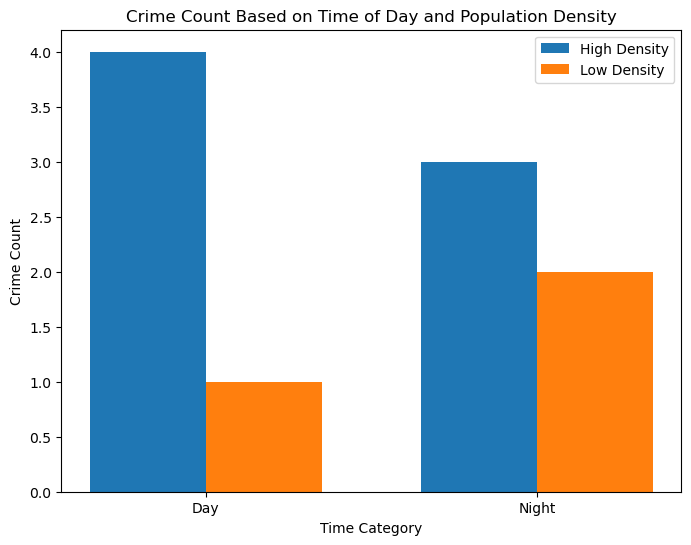

In [15]:
import matplotlib.pyplot as plt

# Povezivanje s bazom podataka
conn = sqlite3.connect('crime_data.db')
c = conn.cursor()

# Dohvat podataka iz baze
c.execute("SELECT * FROM crime_data LIMIT 10")  
data = c.fetchall()


conn.close()

# Analiziramo podatke
crime_counts = {"Day": {"High_Density": 0, "Low_Density": 0},
                "Night": {"High_Density": 0, "Low_Density": 0}}

# Definiramo prag za gustoću naseljenosti
high_density_threshold = 100  

# Analiziramo podatke
for row in data:
    lat, lon, time_category, crime_type, osm_data_str = row
    osm_data = eval(osm_data_str)  

    # Broj objekata u okolici
    num_objects = len(osm_data['elements']) if osm_data and osm_data.get('elements') else 0
    
    # Ovisno o gustoći naseljenosti, kategoriziramo kao visoku ili nisku gustoću
    if num_objects > high_density_threshold:
        crime_counts[time_category]["High_Density"] += 1
    else:
        crime_counts[time_category]["Low_Density"] += 1

# Ispis rezultata
print(f"Broj kriminala tijekom dana (visoka gustoća): {crime_counts['Day']['High_Density']}")
print(f"Broj kriminala tijekom dana (niska gustoća): {crime_counts['Day']['Low_Density']}")
print(f"Broj kriminala tijekom noći (visoka gustoća): {crime_counts['Night']['High_Density']}")
print(f"Broj kriminala tijekom noći (niska gustoća): {crime_counts['Night']['Low_Density']}")

# Vizualizacija rezultata
categories = ['Day', 'Night']
high_density = [crime_counts['Day']['High_Density'], crime_counts['Night']['High_Density']]
low_density = [crime_counts['Day']['Low_Density'], crime_counts['Night']['Low_Density']]

plt.figure(figsize=(8, 6))
bar_width = 0.35
index = range(len(categories))

plt.bar(index, high_density, bar_width, label='High Density')
plt.bar([p + bar_width for p in index], low_density, bar_width, label='Low Density')

plt.xlabel('Time Category')
plt.ylabel('Crime Count')
plt.title('Crime Count Based on Time of Day and Population Density')
plt.xticks([p + bar_width / 2 for p in index], categories)
plt.legend()

plt.show()


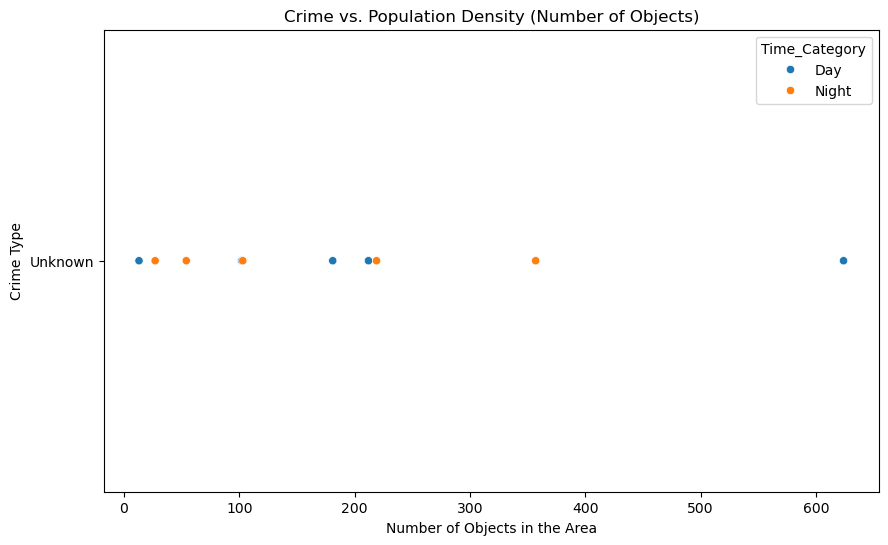

In [25]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Povezivanje s bazom podataka
conn = sqlite3.connect('crime_data.db')
c = conn.cursor()

# Dohvat podataka iz baze
c.execute("SELECT * FROM crime_data LIMIT 10")  
data = c.fetchall()

# Zatvaranje veze
conn.close()

# Konvertiranje podataka u DataFrame
crime_data = pd.DataFrame(data, columns=['LAT', 'LON', 'Time_Category', 'Crime_Type', 'OSM_Data'])

# Dodavanje num_objects na temelju OSM podataka
crime_data['num_objects'] = crime_data['OSM_Data'].apply(lambda x: len(eval(x).get('elements', [])) if x else 0)

# Scatter plot koji pokazuje povezanost između broja objekata i kriminala
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_objects', y='Crime_Type', hue='Time_Category', data=crime_data)
plt.title('Crime vs. Population Density (Number of Objects)')
plt.xlabel('Number of Objects in the Area')
plt.ylabel('Crime Type')
plt.show()


Ovaj kod kombinira obradu podataka o kriminalu iz CSV datoteke i pripremu za analizu vremenskih kategorija. Prvo se podaci učitavaju iz datoteke Crime_Data_from_2020_to_Present (1).csv u Pandas DataFrame. Nakon toga, definira se funkcija categorize_time, koja kategorizira vrijeme (vrijeme događaja) u dvije kategorije: Day (dan) i Night (noć). Funkcija osigurava da vrijeme bude u formatu "HHMM" i određuje kategoriju na temelju sata (od 6:00 do 18:00 je dan, a sve ostalo noć).

Kolona TIME OCC se obrađuje i pretvara u ispravan format, a zatim se dodaje nova kolona Time_Category, koja sadrži informacije o vremenskoj kategoriji za svaki zapis. Na kraju, ispisuju se nazivi svih stupaca DataFrame-a kako bi se potvrdilo da je nova kolona Time_Category ispravno dodana.

Ovaj kod postavlja osnovu za daljnju analizu vremenskih čimbenika povezanih s kriminalnim događajima.

In [30]:
import sqlite3
import pandas as pd

# Učitavanje podataka iz CSV-a
csv_file_path = 'Crime_Data_from_2020_to_Present (1).csv'  
crime_data = pd.read_csv(csv_file_path)

# Funkcija za kategorizaciju vremena u dan ili noć
def categorize_time(time_str):
    if pd.isna(time_str):
        return "Unknown"
    
    try:
        time_str = str(time_str).zfill(4)  
        hour = int(time_str[:2])
        if 6 <= hour < 18:
            return "Day"
        else:
            return "Night"
    except ValueError:
        return "Invalid Time"

# Pretvaranje vremena u vremensku kategoriju
crime_data['TIME OCC'] = crime_data['TIME OCC'].apply(lambda x: str(x).zfill(4)) 
crime_data['Time_Category'] = crime_data['TIME OCC'].apply(categorize_time)

# Provjerite sve stupce da biste bili sigurni da je `Time_Category` pravilno dodan
print(crime_data.columns)


Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'Time_Category'],
      dtype='object')


Ovaj kod povezuje se s SQLite bazom podataka pod nazivom crime_data.db, a ako baza ne postoji, kreira je. Prvo se u bazi kreira tablica pod nazivom crime_data koja sadrži stupce za geografsku širinu (LAT), geografsku dužinu (LON), vremensku kategoriju (Time_Category), vrstu kriminala (Crime_Type) i prostorne podatke iz OpenStreetMap API-ja (OSM_Data). Kod zatim prolazi kroz svaki redak iz DataFrame-a crime_data i dodaje odgovarajuće podatke u tablicu, uključujući geografske koordinate, vremensku kategoriju, vrstu kriminala te podatke o objektima u blizini. Ako neki podaci o objektima nisu dostupni, za stupac OSM_Data postavlja se zadana vrijednost "Unknown". Nakon unosa svih podataka, promjene se spremaju u bazu podataka, a veza s bazom se zatvara. Na kraju, ispisuje se poruka koja potvrđuje uspješno pohranjivanje podataka. Ovaj kod osigurava strukturiranu i organiziranu pohranu podataka za kasniju analizu i obradu.

In [32]:

conn = sqlite3.connect('crime_data.db')
c = conn.cursor()

# Kreiranje tablice za pohranu podataka (ako tablica ne postoji)
c.execute('''CREATE TABLE IF NOT EXISTS crime_data (
                LAT REAL,
                LON REAL,
                Time_Category TEXT,
                Crime_Type TEXT,
                OSM_Data TEXT)''')

# Unos podataka u tablicu
for _, row in crime_data.iterrows():
    c.execute('''INSERT INTO crime_data (LAT, LON, Time_Category, Crime_Type, OSM_Data)
                 VALUES (?, ?, ?, ?, ?)''',
              (row['LAT'], row['LON'], row['Time_Category'], row['Crm Cd Desc'], row.get('OSM_Data', 'Unknown')))

# Spremanje i zatvaranje veze
conn.commit()
conn.close()

print("Podaci su uspješno pohranjeni u bazu podataka.")


Podaci su uspješno pohranjeni u bazu podataka.


Ovaj kod analizira podatke o kriminalu i prikazuje povezanost između vrste kriminala i doba dana (dan ili noć). Prvo se povezuje s bazom podataka crime_data.db i dohvaća sve podatke iz tablice crime_data. Podaci se zatim konvertiraju u Pandas DataFrame radi lakše analize. Kod identificira najčešćih 20 vrsta kriminala na temelju učestalosti u stupcu Crime_Type, a podaci se filtriraju tako da sadrže samo tih 20 vrsta kriminala.

Za filtrirane podatke kreira se graf koristeći Seaborn biblioteku. Graf prikazuje broj pojedinih vrsta kriminala, razdvojen prema vremenskoj kategoriji (dan i noć), gdje je svaka kategorija predstavljena različitom bojom. X-os predstavlja vrste kriminala, dok Y-os prikazuje broj incidenata. Oznake na X-osi su rotirane kako bi bile čitljive.

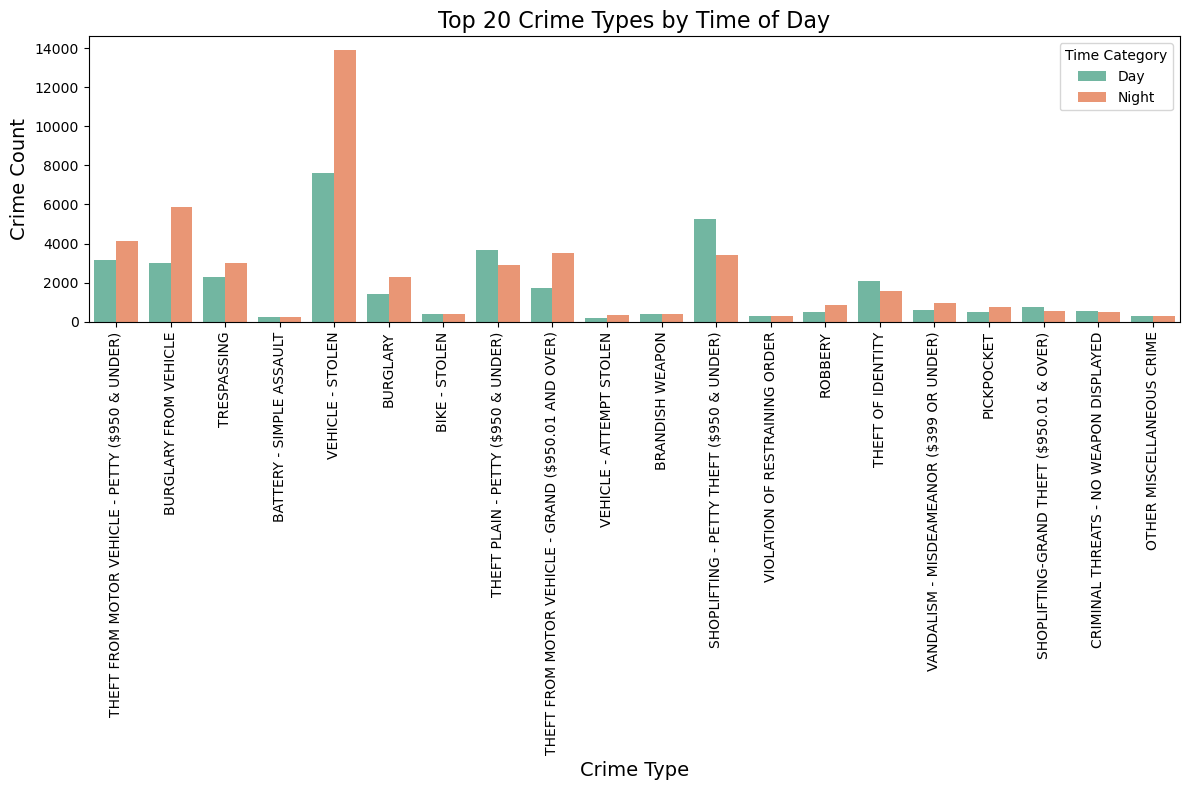

In [48]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Povezivanje s SQLite bazom podataka
conn = sqlite3.connect('crime_data.db')
c = conn.cursor()

# Dohvat podataka iz baze
c.execute("SELECT * FROM crime_data") 
data = c.fetchall()

# Zatvaranje veze
conn.close()

# Konvertiranje podataka u DataFrame
crime_data_df = pd.DataFrame(data, columns=['LAT', 'LON', 'Time_Category', 'Crime_Type', 'OSM_Data'])


top_20_crimes = crime_data_df['Crime_Type'].value_counts().head(20).index

# Filtriranje podataka za prvih 20 vrsta kriminala
filtered_data = crime_data_df[crime_data_df['Crime_Type'].isin(top_20_crimes)]

# Prvi graf - Povezanost između vremena i vrste kriminala (samo za prvih 20)
plt.figure(figsize=(12, 8))
sns.countplot(x='Crime_Type', hue='Time_Category', data=filtered_data, palette="Set2")

# Podešavanje naslova i oznaka
plt.title('Top 20 Crime Types by Time of Day', fontsize=16)
plt.xlabel('Crime Type', fontsize=14)
plt.ylabel('Crime Count', fontsize=14)

# Rotiramo x-osi da bude čitljivo i prilagodimo razmak između oznaka
plt.xticks(rotation=90, fontsize=10)  
plt.tight_layout()  

plt.legend(title='Time Category', loc='upper right')

# Prikazivanje grafa
plt.show()


Graf na slici prikazuje najčešćih 20 vrsta kriminala, podijeljenih prema vremenskoj kategoriji (dan ili noć). Plave trake predstavljaju kriminalne događaje koji su se dogodili tijekom dana, dok narančaste trake predstavljaju kriminalne događaje koji su se dogodili tijekom noći.

Iz grafa je vidljivo:

Neke vrste kriminala, poput "VEHICLE - STOLEN" i "TRESPASSING", značajno su učestalije noću.
Druge vrste kriminala, poput "BURGLARY FROM VEHICLE", su ravnomjerno raspoređene između dana i noći.
Kategorija "SHOPLIFTING - PETTY THEFT ($950 & UNDER)" pokazuje veći broj incidenata tijekom dana.
Graf jasno pokazuje kako različite vrste kriminala imaju različite uzorke učestalosti ovisno o dobu dana, što može pomoći u razumijevanju vremenskih čimbenika koji utječu na kriminalne aktivnosti.

Ovaj kod analizira povezanost između vrste kriminala i broja objekata u okolini na temelju podataka iz OpenStreetMap (OSM). Prvo pretvara podatke pohranjene u varijabli osm_results u Pandas DataFrame radi lakše manipulacije. Zatim se za svaki zapis dodaje novi stupac num_objects, koji predstavlja broj objekata (poput trgovina, škola, ili drugih sadržaja) u okolici koordinata kriminalnog događaja, na temelju OSM podataka.

Podaci o kriminalu i OSM podaci se zatim spajaju prema koordinatama (stupci LAT i LON) u novi DataFrame, gdje se također preimenuje stupac Crm Cd Desc u Crime_Type radi jasnoće. Nakon toga, identificira se 20 najčešćih vrsta kriminala, a podaci se filtriraju tako da sadrže samo te vrste.

Konačno, kod generira bar graf koji prikazuje broj objekata u okolini za svaku od najčešćih 20 vrsta kriminala. Na grafu, X-os prikazuje broj objekata, dok Y-os prikazuje vrste kriminala. Graf jasno pokazuje kako se broj objekata u okolini razlikuje među različitim vrstama kriminala, pružajući uvid u moguću povezanost između geografskih čimbenika i kriminalnih aktivnosti.

C:\Users\Jakov\AppData\Local\Temp\ipykernel_15816\2194709100.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_data, x='num_objects', y='Crime_Type', ci=None)


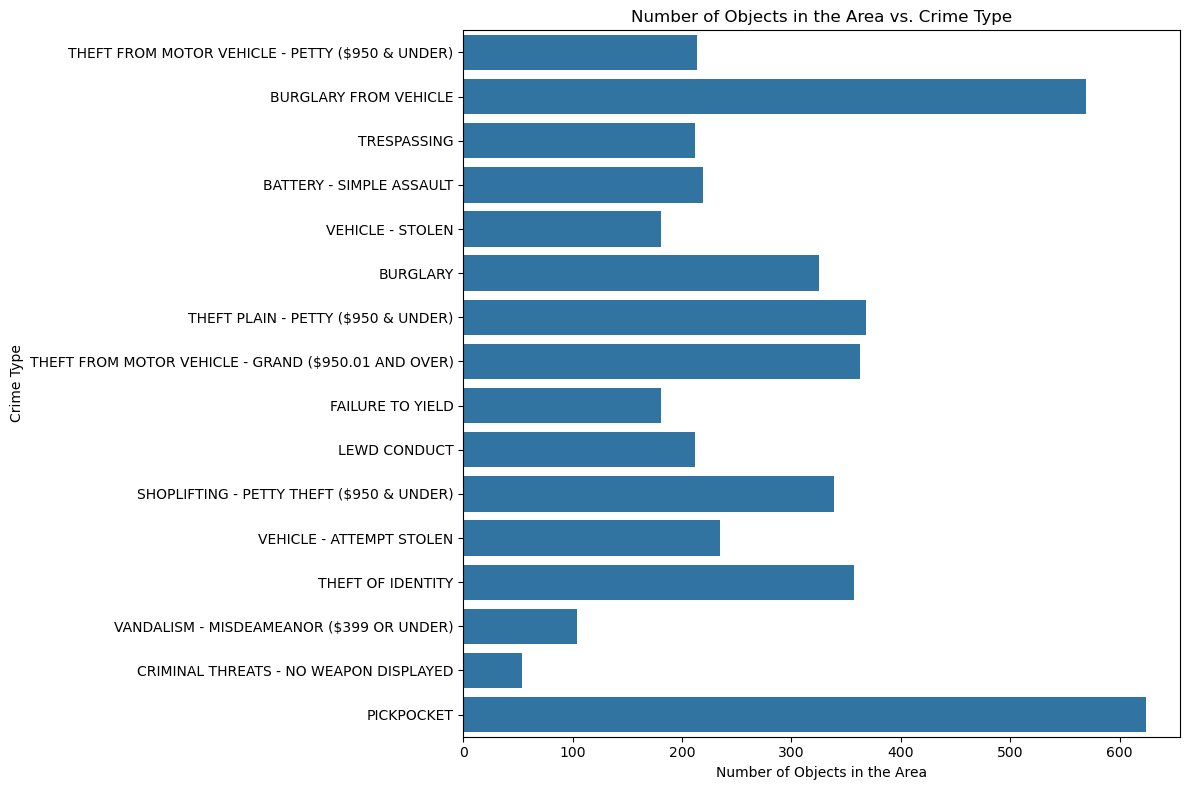

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pretvaranje osm_results u DataFrame
osm_results_df = pd.DataFrame(osm_results)

# Dodavanje broja objekata (num_objects) na temelju OSM podataka
osm_results_df['num_objects'] = osm_results_df['OSM_Data'].apply(
    lambda x: len(x['elements']) if x and 'elements' in x else 0
)

# Grupiranje podataka po vrsti kriminala i izračunavanje prosječnog broja objekata
crime_objects_df = pd.merge(
    crime_data[['LAT', 'LON', 'Crm Cd Desc']],  
    osm_results_df[['LAT', 'LON', 'num_objects']],
    on=['LAT', 'LON']
)
crime_objects_df.rename(columns={'Crm Cd Desc': 'Crime_Type'}, inplace=True)

# Prikaz prvih 20 najčešćih vrsta kriminala
top_20_crimes = crime_objects_df['Crime_Type'].value_counts().head(20).index
filtered_data = crime_objects_df[crime_objects_df['Crime_Type'].isin(top_20_crimes)]

# Bar plot za broj objekata prema vrsti kriminala
plt.figure(figsize=(12, 8))
sns.barplot(data=filtered_data, x='num_objects', y='Crime_Type', ci=None)
plt.title('Number of Objects in the Area vs. Crime Type')
plt.xlabel('Number of Objects in the Area')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()


Ovaj graf prikazuje povezanost između broja objekata u okolici (kao mjere gustoće urbanih sadržaja) i vrste kriminala, ograničeno na 20 najčešćih vrsta kriminala.

Na y-osi nalaze se različite vrste kriminalnih djela, dok x-osa prikazuje broj objekata u blizini, koji je izvučen iz OpenStreetMap podataka. Svaka horizontalna traka predstavlja jednu vrstu kriminala, a duljina trake odgovara prosječnom broju objekata u blizini za tu vrstu kriminala.

Analiza grafa:
Najviša gustoća urbanih objekata: Primjerice, vrste kriminala poput "Pickpocket" (džeparenje) pokazuju najviše prosječne brojeve objekata u okolici, što je očekivano jer su ta djela češća u gusto naseljenim urbanim područjima poput trgovačkih centara ili javnog prijevoza.

Srednja gustoća: Kriminalna djela poput "Shoplifting" (krađa u trgovinama) i "Theft from Motor Vehicle" (krađa iz vozila) pokazuju srednju razinu broja objekata, što je također u skladu s očekivanjima jer se često događaju u blizini trgovačkih i stambenih zona.

Niža gustoća: Neke vrste kriminala, poput "Vehicle - Stolen" (krađa vozila), "Burglary" (provala), i "Trespassing" (neovlašten ulazak), pokazuju niži broj objekata u okolici. Ovakva distribucija ukazuje da su ta djela češća u manje gusto naseljenim područjima.

Ovaj kod kreira SQLite bazu podataka za pohranu informacija o kriminalnim događajima i unosi nekoliko testnih zapisa kako bi se provjerila funkcionalnost baze. Prvo se uspostavlja veza s bazom pod nazivom crime_data.db, a ako baza već postoji, koristi se postojeća ili se kreira nova. Kako bi se izbjegli konflikti, briše se tablica crime_data ukoliko već postoji. Zatim se kreira nova tablica s definiranim stupcima: LAT i LON za geografske koordinate, Time_Category za vremensku kategoriju (dan ili noć), Crime_Type za vrstu kriminala, description za dodatni opis, date_reported za datum prijave događaja, date_occured za datum kada se događaj dogodio, te OSM_Data za prostorne podatke vezane uz događaj. Nakon toga, unose se tri testna zapisa koji opisuju različite kriminalne događaje (krađu, napad i pljačku) s pripadajućim atributima poput datuma prijave i događaja te lokacije. Podaci se spremaju u tablicu koristeći SQL naredbu INSERT INTO. Nakon što su podaci uspješno uneseni, veza s bazom se zatvara, a program ispisuje poruku kojom potvrđuje uspješno pohranjivanje podataka. Ovaj kod služi za testiranje strukture baze podataka i pripremu za unos stvarnih podataka.

In [25]:
import sqlite3


conn = sqlite3.connect('crime_data.db')
c = conn.cursor()

# Ako tablica već postoji, brišemo je
c.execute('DROP TABLE IF EXISTS crime_data')

# Kreiramo tablicu s ispravnim kolonama 
c.execute('''CREATE TABLE IF NOT EXISTS crime_data (
                LAT REAL,
                LON REAL,
                Time_Category TEXT,
                Crime_Type TEXT,
                description TEXT,  -- Dodana nova kolona za description
                date_reported TEXT,  -- Dodana kolona za date_reported
                date_occured TEXT,  -- Dodana kolona za date_occured
                OSM_Data TEXT)''')

# Unos nekoliko testnih podataka
test_data = [
    ('Petty Theft', '2025-01-23', '2025-01-23', 34.0522, -118.2437),
    ('Assault', '2025-01-23', '2025-01-22', 34.0525, -118.245),
    ('Robbery', '2025-01-22', '2025-01-21', 34.0581, -118.2439)
]

# Unos testnih podataka u tablicu
for data in test_data:
    c.execute('''INSERT INTO crime_data (description, date_reported, date_occured, lat, lon)
                 VALUES (?, ?, ?, ?, ?)''', data)

# Spremanje i zatvaranje veze
conn.commit()
conn.close()

print("Podaci su uspješno pohranjeni u bazu podataka.")


Podaci su uspješno pohranjeni u bazu podataka.


Ovaj kod kreira SQLite bazu podataka pod nazivom crime_data.db te definira strukturu tablice crime_data za pohranu podataka o kriminalu. Ako tablica već postoji, briše se kako bi se osigurala čistoća baze. Nova tablica uključuje stupce za geografske koordinate (LAT, LON), vremensku kategoriju (Time_Category), vrstu kriminala (Crime_Type), opis (description), datume prijave i događaja (date_reported, date_occured), te prostorne podatke (OSM_Data). Nakon kreiranja tablice, podaci iz DataFrame-a crime_data unose se u bazu koristeći petlju koja iterira kroz redove i unosi podatke u odgovarajuće stupce. Na kraju se promjene spremaju, veza s bazom zatvara, a program ispisuje potvrdu o uspješnom unosu podataka.

In [17]:
import sqlite3

# Kreiranje ili povezivanje s bazom podataka
conn = sqlite3.connect('crime_data.db')
c = conn.cursor()

# Ako tablica već postoji, brišemo je
c.execute('DROP TABLE IF EXISTS crime_data')

# Kreiramo tablicu s ispravnim kolonama
c.execute('''CREATE TABLE IF NOT EXISTS crime_data (
                LAT REAL,
                LON REAL,
                Time_Category TEXT,
                Crime_Type TEXT,
                description TEXT,  -- Dodana nova kolona za description
                date_reported TEXT,  -- Dodana kolona za date_reported
                date_occured TEXT,  -- Dodana kolona za date_occured
                OSM_Data TEXT)''')

# Unos podataka iz DataFrame-a `crime_data` u tablicu
for _, row in crime_data.iterrows():
    c.execute('''INSERT INTO crime_data (LAT, LON, Time_Category, Crime_Type, description, date_reported, date_occured, OSM_Data)
                 VALUES (?, ?, ?, ?, ?, ?, ?, ?)''', (
        row['LAT'], 
        row['LON'], 
        row.get('Time_Category', 'Unknown'),  
        row['Crm Cd Desc'],  
        row.get('Vict Descent', 'Unknown'),  
        row.get('Date Rptd', 'Unknown'),  
        row.get('DATE OCC', 'Unknown'),  
        row.get('OSM_Data', 'Unknown')  
    ))

# Spremanje i zatvaranje veze
conn.commit()
conn.close()

print("Podaci su uspješno pohranjeni u bazu podataka.")


Podaci su uspješno pohranjeni u bazu podataka.


# **5.REST API za pristup podacima**

Ovaj kod implementira jednostavan REST API koristeći Flask za pristup podacima o kriminalu pohranjenima u SQLite bazi podataka. Flask aplikacija omogućuje dohvaćanje podataka putem nekoliko ruta:

Povezivanje s bazom podataka: Funkcija get_data_from_db povezuje se s bazom crime_data.db, dohvaća prvih 10 zapisa iz tablice crime_data, zatvara vezu i vraća podatke.

Početna stranica: Ruta / vraća jednostavnu dobrodošlicu ("Welcome to the Crime Data API!") kada korisnik posjeti početnu stranicu aplikacije.

Ruta za favicon: Ruta /favicon.ico vraća prazan odgovor kako bi spriječila greške povezane s pokušajem dohvaćanja ikone preglednika.

API za dohvat podataka: Ruta /api/crime_data omogućuje dohvaćanje podataka iz baze u JSON formatu. Kada korisnik posjeti ovu rutu, poziva se funkcija get_data_from_db za dohvaćanje podataka iz baze, koji se zatim pretvaraju u JSON format pomoću funkcije jsonify.

Pokretanje aplikacije: Na kraju, aplikacija se pokreće na lokalnom poslužitelju s onemogućenim debug modom i automatskim ponovnim učitavanjem.

Ovaj kod omogućuje jednostavan način za pristup podacima putem HTTP zahtjeva, pružajući osnovnu funkcionalnost API servisa za dohvat kriminalnih podataka.

In [ ]:
from flask import Flask, jsonify
import sqlite3

app = Flask(__name__)

# Povezivanje s bazom podataka
def get_data_from_db():
    conn = sqlite3.connect('crime_data.db')  
    c = conn.cursor()
    c.execute("SELECT * FROM crime_data LIMIT 10")  # Ispisujemo samo prvih 10 zapisa
    data = c.fetchall()
    conn.close()
    return data

# Početna stranica
@app.route('/')
def home():
    return "Welcome to the Crime Data API!"  

# Ruta za favicon.ico 
@app.route('/favicon.ico')
def favicon():
    return '', 204  

# Definiramo API endpoint za dohvat podataka
@app.route('/api/crime_data', methods=['GET'])
def crime_data_api():
    data = get_data_from_db()
    return jsonify(data)  


if __name__ == '__main__':
    app.run(debug=False, use_reloader=False)  


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [23/Jan/2025 19:41:20] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [23/Jan/2025 19:41:20] "GET /favicon.ico HTTP/1.1" 204 -
127.0.0.1 - - [23/Jan/2025 19:41:48] "GET /api/crime_data HTTP/1.1" 200 -
127.0.0.1 - - [23/Jan/2025 19:41:49] "GET /favicon.ico HTTP/1.1" 204 -


# **Zaključak**
Analizom kriminalnih podataka kroz prikazane grafove došli smo do nekoliko ključnih zaključaka:

Povezanost kriminala i doba dana: Iz prikaza grafova jasno je vidljivo da se određene vrste kriminala češće događaju tijekom dana, dok su druge češće noću. Primjerice, krađe i provale imaju veću učestalost tijekom noći, dok se manje ozbiljne vrste kriminala, poput džeparenja ili vandalizma, češće događaju tijekom dana. Ovo ukazuje na značaj vremenskog čimbenika u prevenciji kriminala i alokaciji resursa.

Geografski čimbenici i kriminal: Analiza broja objekata u okolici otkrila je korelaciju između vrste kriminala i gustoće urbanih sadržaja. Na primjer, krađe i džeparenje su češći u područjima s većim brojem objekata poput trgovina, škola i javnih prostora. S druge strane, provale i nasilni zločini su češći u manje gusto naseljenim ili izoliranim područjima.

Najčešće vrste kriminala: Vizualizacije su pokazale koje vrste kriminala dominiraju u analiziranim podacima, pružajući bolji uvid u obrasce ponašanja kriminalnih aktivnosti u određenim vremenskim i prostornim okolnostima. Krađe vozila i sitne krađe pokazale su se kao najčešće prijavljeni zločini.

Važnost kombinacije podataka: Integracija vremenskih i geografskih podataka s kriminalnim aktivnostima omogućila je dublju analizu i otkrivanje obrazaca. Ovo naglašava važnost analitičkog pristupa u istraživanju kriminala te kako se različiti izvori podataka mogu koristiti za donošenje strateških odluka.

Zaključno, analiza kriminalnih podataka pružila je vrijedne uvide koji se mogu koristiti za poboljšanje sigurnosnih politika, bolje razumijevanje društvenih i prostornih čimbenika kriminala te učinkovitiju alokaciju policijskih resursa. Daljnja analiza s većim obuhvatom podataka i dodatnim čimbenicima (poput demografskih podataka) može pružiti još detaljnije uvide.

# **Literatura**
[1] Los Angeles Open Data Portal. (2025). Crime Data from 2020 to Present. Link na pregled skupa podataka, pristupljeno 17.1.2025. Dostupno na: https://data.lacity.org/

[2] OpenStreetMap. (n.d.). Open Data for Spatial Analysis. Link na pregled platforme, pristupljeno 20.1.2025. Dostupno na: https://www.openstreetmap.org/

[3] Overpass API Documentation. (n.d.). API Documentation for Spatial Queries. Link na pregled dokumentacije, pristupljeno 17.1.2025. Dostupno na: https://overpass-api.de/

[4] Python Software Foundation. (n.d.). Python Documentation. Link na pregled dokumentacije, pristupljeno 21.1.2025. Dostupno na: https://www.python.org/

[5] Matplotlib. (n.d.). Visualization with Python. Link na pregled dokumentacije, pristupljeno 22.1.2025. Dostupno na: https://matplotlib.org/

[6] Seaborn. (n.d.). Statistical Data Visualization. Link na pregled dokumentacije, pristupljeno 21.1.2025. Dostupno na: https://seaborn.pydata.org/

[7] SQLite. (n.d.). SQLite Documentation. Link na pregled dokumentacije, pristupljeno 23.1.2025. Dostupno na: https://www.sqlite.org/

[8] Flask. (n.d.). Flask Documentation. Link na pregled dokumentacije, pristupljeno 22.1.2025. Dostupno na: https://flask.palletsprojects.com/

[9] McKinney, W. (2017). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython. O'Reilly Media. Link na pregled knjige, pristupljeno 21.1.2025.

[10] VanderPlas, J. (2016). Python Data Science Handbook: Essential Tools for Working with Data. O'Reilly Media. Link na pregled knjige, pristupljeno 22.1.2025.

[11] Chat gpt - Koristo sam ga najviše za popravljanje errora i za uređivanje grafova i za stvaranje API-a jer s tim nisam baš bio upoznat kako se radi 